In [77]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
df_market_data.columns.str.strip()

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [4]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(
    df_market_data[["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", 
                    "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", 
                    "price_change_percentage_1y"]]
)

In [7]:
# Create a DataFrame with the scaled data
df_market_scaled = pd.DataFrame(
    market_data_scaled,
    columns=["price_change_percentage_24h", "price_change_percentage_7d", 
             "price_change_percentage_14d", "price_change_percentage_30d", 
             "price_change_percentage_60d", "price_change_percentage_200d", 
             "price_change_percentage_1y"],
    index=df_market_data.index# Set the coinid column as index
)

# Copy the crypto names from the original data
#df_market_scaled["coin_id"] = df_market_data.index


#df_market_scaled = df_market_data.set_index("coin_id", inplace = True)

# Display sample data
df_market_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [8]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [9]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
# Inside the loop:

    kmeans = KMeans(n_clusters=k, random_state=0) # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans.fit(df_market_scaled) # 2. Fit the model to the data using `df_market_data_scaled`
    inertia.append(kmeans.inertia_)# 3. Append the model.inertia_ to the inertia list


C:\Users\Emmy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Emmy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Emmy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Emmy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

In [10]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

In [11]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot = df_elbow.hvplot.line(x="k", y="inertia", 
                                  title="Elbow Curve", 
                                  xlabel="Number of Clusters (k)", 
                                  ylabel="Inertia")

elbow_plot

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 
The best value for "k" in the Elbow Curve is typically identified at the "elbow" point, where the inert starts to decrease more slowly. For this data the best value for "k" is 4. 

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [12]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)

In [13]:
# Fit the K-Means model using the scaled data
model.fit(df_market_scaled)

C:\Users\Emmy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Emmy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [14]:
# Predict the clusters to group the cryptocurrencies using the scaled data
market_data_clusters = model.predict(df_market_scaled)

# Print the resulting array of cluster values.
print(market_data_clusters)

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 3 1 0 0 2
 0 0 0 0]


In [15]:
# Create a copy of the DataFrame
df_market_copy = df_market_data.copy()

In [16]:
# Add a new column to the DataFrame with the predicted clusters
df_market_copy['cluster'] = market_data_clusters

# Display sample data
df_market_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,1
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,1
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,1


In [17]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# the cryptocurrency represented by each data point.
market_scatter_plot = df_market_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="cluster",  
    cmap='viridis',  # Color the graph points with the labels found using K-Means and 
    hover_cols=['coin_id'], # add the crypto name in the `hover_cols` parameter to identify 
    title="K-Means Clustering of Cryptocurrencies",
    xlabel="Price Change Percentage (24h)",
    ylabel="Price Change Percentage (7d)"
)

market_scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [22]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [36]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_results = pca_model.fit_transform(df_market_scaled)
# View the first five rows of the DataFrame. 
pca_df = pd.DataFrame(
    pca_results,
    columns=['PC1', 'PC2', 'PC3'],
    index=df_market_scaled.index
)
pca_df.head(5)

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [31]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_

#total_variance = explained_variance.cumsum()

print("Explained variance ratio for each principal component:", explained_variance)
#print("Total explained variance ratio:", total_variance)

Explained variance ratio for each principal component: [0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:**  The total explained variance by a set of principal componets is the sum of the individual explained variance ratios. In this circumstance the total explained variance is  0.89503166 or 89.5%. 

In [50]:
# Create a new DataFrame with the PCA data.
pca_data = pca_model.fit_transform(df_market_scaled)
# Creating a DataFrame with the PCA data
pca_data_df = pd.DataFrame(
    pca_data,
    columns = ['PC1', 'PC2', 'PC3'],
    index = df_market_scaled.index
)
# Copy the crypto names from the original data
# Set the coinid column as index
#pca_data_df.reset_index(inplace = True)
#pca_data_df.rename(columns={'index': 'coin_id'}, inplace = True)

# Display sample data
pca_data_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [80]:
# Create a list with the number of k-values from 1 to 11
pca_k_values = list(range(1,12))

In [81]:
# Create an empty list to store the inertia values
pca_inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in pca_k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # 2. Fit the model to the data using the PCA-transformed DataFrame
    kmeans.fit(pca_data_df)
    
    # 3. Append the model's inertia_ to the inertia list
    pca_inertia_values.append(kmeans.inertia_)


C:\Users\Emmy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Emmy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Emmy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Emmy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

In [82]:
# Create a dictionary with the data to plot the Elbow curve
pca_elbow = {
    "k" : pca_k_values,
    "inertia" : pca_inertia_values
}
# Create a DataFrame with the data to plot the Elbow curve
pca_elbow_df = pd.DataFrame(pca_elbow)

In [84]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
pca_elbow_plot = pca_elbow_df.hvplot.line(x="k", y="inertia", 
                                           title="Elbow Curve", 
                                           xlabel="Number of Clusters (k)", 
                                           ylabel="Inertia")

pca_elbow_plot

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** Using the PCA data, the best value for "k" is debatable between 3 and 4, but there is still enough of a change that the best value would be 4.
  * 
* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**  The results of the elbow curve differs from the original data, but even still using the PCA-reduced data the elbow point is the same as in the original data, it suggests that the essential structure and clustering paterns in the data have been preserved even after dimensionality reduction. 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [98]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters = 4)

In [99]:
# Fit the K-Means model using the PCA data
model.fit(pca_data_df)

C:\Users\Emmy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Emmy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [100]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_market_clusters = model.predict(pca_data_df)
# Print the resulting array of cluster values.
print(pca_market_clusters)

[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 2 3 0 0 1
 0 0 0 0]


In [101]:
# Create a copy of the DataFrame with the PCA data
pca_data_copy = pca_data_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_data_copy['cluster'] = market_data_clusters

# Display sample data
pca_data_copy.head()

,PC1,PC2,PC3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,1


In [102]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
# Create a scatter plot using hvPlot
scatter_plot = pca_data_copy.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="cluster",  
    hover_cols=["coin_id"],  
    title="Cryptocurrency Clusters by PCA Components"
)

# Display the plot
scatter_plot


:Scatter   [PC1]   (PC2,cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

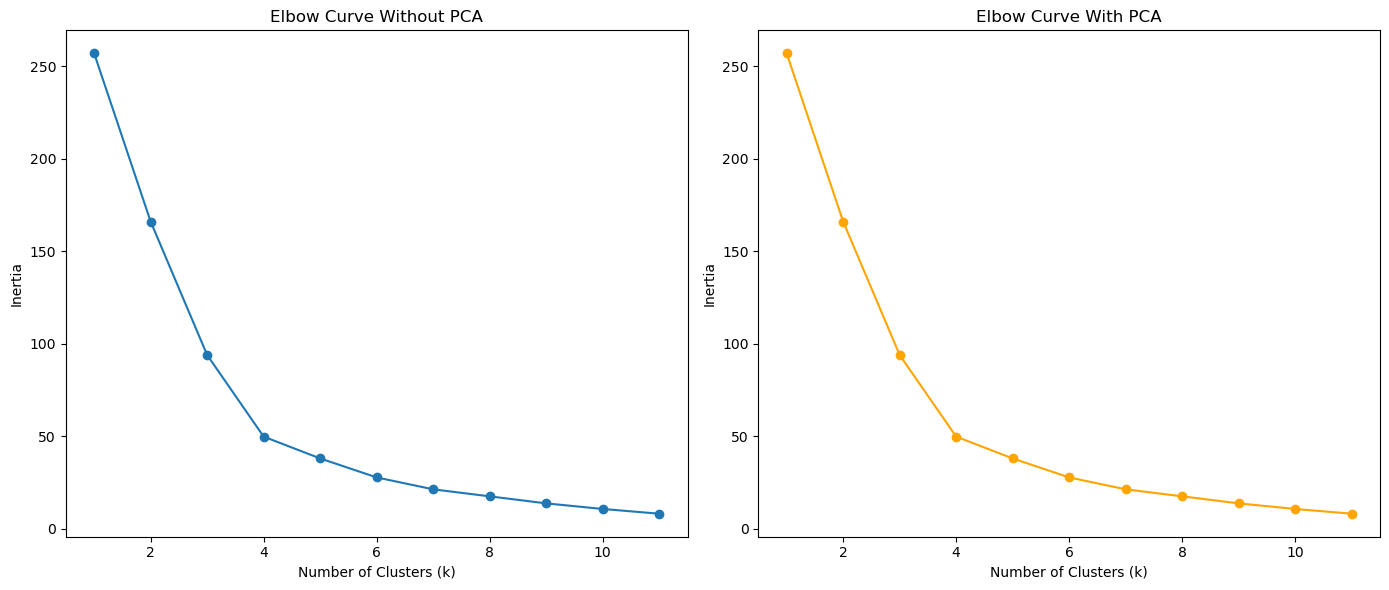

In [103]:
# Composite plot to contrast the Elbow curves
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Elbow curve without PCA
ax[0].plot(k_values, inertia_values, marker='o')
ax[0].set_title('Elbow Curve Without PCA')
ax[0].set_xlabel('Number of Clusters (k)')
ax[0].set_ylabel('Inertia')

# Elbow curve with PCA
ax[1].plot(pca_k_values, pca_inertia_values, marker='o', color='orange')
ax[1].set_title('Elbow Curve With PCA')
ax[1].set_xlabel('Number of Clusters (k)')
ax[1].set_ylabel('Inertia')

# Display the plots
plt.tight_layout()
plt.show()

In [104]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
clusters_plot_no_pca = pca_data_copy.hvplot.scatter(
    x="PC1", y="PC2", c="cluster", 
    hover_cols=["coin_id"], title="Clusters Without PCA"
)

# Plot clusters with PCA
clusters_plot_pca = pca_data_copy.hvplot.scatter(
    x="PC1", y="PC2", c="cluster", 
    hover_cols=["coin_id"], title="Clusters With PCA"
)

# Composite plot to contrast the clusters
clusters_comparison = clusters_plot_no_pca + clusters_plot_pca
clusters_comparison.cols(2)


:Layout
   .Scatter.I  :Scatter   [PC1]   (PC2,cluster,coin_id)
   .Scatter.II :Scatter   [PC1]   (PC2,cluster,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features to cluster the data using k-means can lead to a more straightforward and interpretable clustering model. By reducing the number of features with PCA techniques, the algorithm can focus on the most important aspects of the data potentially resulting in clearer and more defined clusters. The drawback however, is the potential loss of information which could result in less precise clusters. 